In [27]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [28]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [29]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)

In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#merge


merge_df= pd.merge(city_data, ride_data, on = "city", how = "inner" )

In [6]:
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [30]:
# Obtain the x and y coordinates for each of the three city types

city_data.groupby("type").sum()



# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [31]:
#x is how many rows/transactions for each city

#x
ride_data.groupby("city").count().iloc[:,0]

x_city= ride_data.groupby("city").count().iloc[:,0]

In [32]:
#y is average fare


#y
ride_data.groupby("city").mean()["fare"]
y_city= ride_data.groupby("city").mean()["fare"]

In [33]:
x_city\
.reset_index()\
.merge(y_city.reset_index(), on="city", how = "left")\
.merge(city_data, on = "city", how = "left")\
.rename(columns = {"date":"number_transactions"}).head()




,city,number_transactions,fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


In [9]:
df4= x_city\
.reset_index()\
.merge(y_city.reset_index(), on="city", how= "left")\
.merge(city_data, on = "city", how = "left")\
.rename(columns = {"date":"number_transactions"})


In [10]:
#build scattter plots for each city type

df4.head()

,city,number_transactions,fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


In [11]:
Urban = df4[df4["type"] == "Urban"]

Suburban = df4[df4["type"] == "Suburban"]

Rural = df4[df4["type"] == "Rural"]




In [12]:
Urban.head()

,city,number_transactions,fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
6,Carriemouth,27,28.314444,52,Urban
7,Christopherfurt,27,24.501852,41,Urban
10,Deanville,19,25.842632,49,Urban


Text(0, 0.5, 'Transactions')

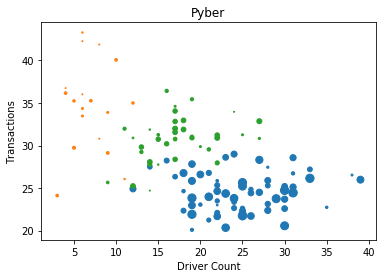

In [13]:
# make scatter plot

plt.scatter(Urban["number_transactions"], Urban["fare"], s=Urban["driver_count"])
plt.scatter(Rural["number_transactions"], Rural["fare"], s=Rural["driver_count"])
plt.scatter(Suburban["number_transactions"], Suburban["fare"], s=Suburban["driver_count"])

#x and y axis and title

plt.title("Pyber")
plt.xlabel("Driver Count")
plt.ylabel("Transactions")

In [14]:
# Incorporate the other graph properties

# Create a legend


# Incorporate a text label regarding circle size

# Save Figure

In [15]:
plt.tight_layout()
plt.savefig("../Pyber/Pyber_hw.png")
plt.show()


<Figure size 432x288 with 0 Axes>

In [16]:
# Show plot
plt.show()

In [17]:
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Total Fares by City Type

In [18]:
# Calculate Type Percents

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

fare_percentages = (merge_df.groupby('type').sum()['fare'] / merge_df['fare'].sum()) * 100

fare_percentages['Rural']








# Save Figure


6.811492974983412

In [19]:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)





([<matplotlib.patches.Wedge at 0x1173413c8>,
 [Text(-1.0620893660215651, 0.558539325906341, 'Urban'),
  Text(-0.850538622602409, -0.6975557694275039, 'Suburban'),
  Text(0.9792719482229784, 0.5010253999784567, 'Rural')],
 [Text(-0.6195521301792464, 0.32581460677869895, '6.8%'),
  Text(-0.4639301577831321, -0.38048496514227476, '30.5%'),
  Text(0.5341483353943518, 0.2732865818064309, '62.7%')])

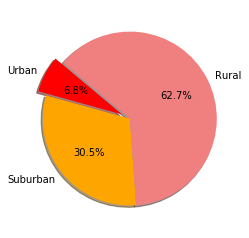

In [20]:
#make figure
plt.pie(fare_percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



In [21]:
# Show Figure
plt.show()

## Total Rides by City Type

In [22]:
# Calculate Ride Percents
driver_percentages = (merge_df.groupby('type').sum()['driver_count'] / merge_df['driver_count'].sum()) * 100

driver_percentages['Rural']


# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart

# Save Figure


([<matplotlib.patches.Wedge at 0x11877d048>,
 [Text(-0.9379134478323147, 0.7485441632764898, 'Urban'),
  Text(-1.0638228984112676, 0.27978713482905126, 'Suburban'),
  Text(1.056633261472597, -0.3058204550872664, 'Rural')],
 [Text(-0.5471161779021835, 0.43665076191128566, '0.8%'),
  Text(-0.580267035497055, 0.15261116445220976, '12.5%'),
  Text(0.5763454153486892, -0.1668111573203271, '86.7%')])

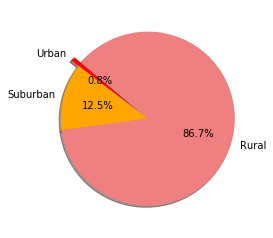

In [34]:
plt.pie(driver_percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [23]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x1188054e0>,
 [Text(-1.0287019409931513, 0.6178772666128148, 'Urban'),
  Text(-0.9869938773513053, -0.48563678410004807, 'Suburban'),
  Text(1.0508659355351344, 0.325085812566262, 'Rural')],
 [Text(-0.6000761322460048, 0.3604284055241419, '5.0%'),
  Text(-0.5383602967370755, -0.2648927913272989, '26.8%'),
  Text(0.5731996012009823, 0.177319534127052, '68.2%')])

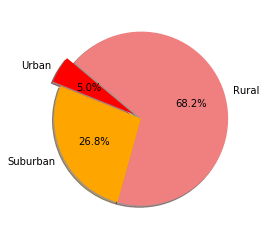

In [35]:
# Calculate Driver Percents


ride_percentages = (merge_df.groupby('type').sum()['ride_id'] / merge_df['ride_id'].sum()) * 100

ride_percentages['Rural']


# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)


# Build Pie Charts

plt.pie(ride_percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



# Save Figure
